Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
from scripts.imports import *
from scripts.data_variables import *
from scripts.gameStats_functions import *

In [2]:
from scripts.get_read_write import *

In [3]:
data = read_all_from_file()
player_ids = data[0] 
player_summaries = data[1]
player_friends = data[2]
player_games = data[3]
player_achievements = data[4]
player_bans = data[5]
global_game_stats = data[6]
game_names= data[7]
#player_ids = read_player_ids()
print("Current database size: {} users".format(len(player_ids)))
#player_summaries = read_player_summaries()
#player_friends = read_player_friends()
#player_games = read_player_games()
#player_bans = read_player_bans()

INFO: reading ids
INFO: reading ids finished
INFO: reading summaries
INFO: reading summaries finished
INFO: reading friends
INFO: reading friends finished
INFO: reading games
INFO: reading games finished
INFO: reading achievements
INFO: reading achievements finished
INFO: reading bans
INFO: reading bans finished
INFO: reading global game stats
INFO: reading global game stats finished
INFO: reading game names
INFO: reading game names finished
Current database size: 100000 users


In [4]:
len(player_ids)

100000

76561197960274545
{'game_count': 698, 'games': [{'appid': 10, 'playtime_forever': 1}, {'appid': 20, 'playtime_forever': 1}, {'appid': 30, 'playtime_forever': 1}, {'appid': 40, 'playtime_forever': 0}, {'appid': 50, 'playtime_forever': 1}, {'appid': 60, 'playtime_forever': 1}, {'appid': 70, 'playtime_forever': 2}, {'appid': 130, 'playtime_forever': 0}, {'appid': 80, 'playtime_forever': 0}, {'appid': 100, 'playtime_forever': 0}, {'appid': 220, 'playtime_forever': 207}, {'appid': 240, 'playtime_forever': 1}, {'appid': 320, 'playtime_forever': 1}, {'appid': 340, 'playtime_forever': 25}, {'appid': 300, 'playtime_forever': 201}, {'appid': 280, 'playtime_forever': 0}, {'appid': 360, 'playtime_forever': 0}, {'appid': 1002, 'playtime_forever': 1}, {'appid': 1200, 'playtime_forever': 1}, {'appid': 1230, 'playtime_forever': 0}, {'appid': 1280, 'playtime_forever': 0}, {'appid': 380, 'playtime_forever': 1}, {'appid': 2400, 'playtime_forever': 268}, {'appid': 2430, 'playtime_forever': 0}, {'appid': 1

# Odgovori na vprašanja

Najbolj igrane igre

In [5]:
def getMostCommonGamesAndHighestPlaytimeSorted( player_games):
    globalGamePlayTime=dict()
    numberOfPlayersForGame=dict()
    for user in player_games:
        if(player_games[user]!={} and player_games[user]['game_count']!=0):
            for game_info in player_games[user]["games"]:
                if( game_info['appid'] not in globalGamePlayTime):
                    globalGamePlayTime[game_info['appid']]=game_info['playtime_forever']
                    numberOfPlayersForGame[game_info['appid']]=1
                else:
                    globalGamePlayTime[game_info['appid']]+=game_info['playtime_forever']
                    numberOfPlayersForGame[game_info['appid']]+=1
    TopTotalPlaytime= sorted(globalGamePlayTime.items(), key=lambda x: x[1], reverse=True)
    TopBoughtGames= sorted(numberOfPlayersForGame.items(), key=lambda x: x[1], reverse=True)
    return (TopBoughtGames,TopTotalPlaytime)


def plotTopPlaytimeGames( sortedGames):
    games=[]
    playtimes=[]
    for game,playtime in sortedGames:
        games.append(str(game_names[str(game)]))
        playtimes.append(playtime/60)
    y_pos = np.arange(len(games))
    plt.figure(figsize=(15,15))
    plt.barh(games,playtimes, align='center', alpha=0.5)
    #plt.yticks(y_pos, games)
    plt.xlabel("Čas igranja v urah")
    plt.title('Največ igranih iger')
    plt.show()
    return None

def plotTopBoughtGames( sortedGames):
    games=[]
    playtimes=[]
    for game,playtime in sortedGames:
        games.append(str(game_names[str(game)]))
        playtimes.append(playtime)
    y_pos = np.arange(len(games))
    plt.figure(figsize=(15,15))
    plt.barh(games,playtimes, align='center', alpha=0.5)
    #plt.yticks(y_pos, games)
    plt.xlabel("Najbolj razširjena igra")
    plt.title('št. igralcev z to igro')
    plt.show()
    return None

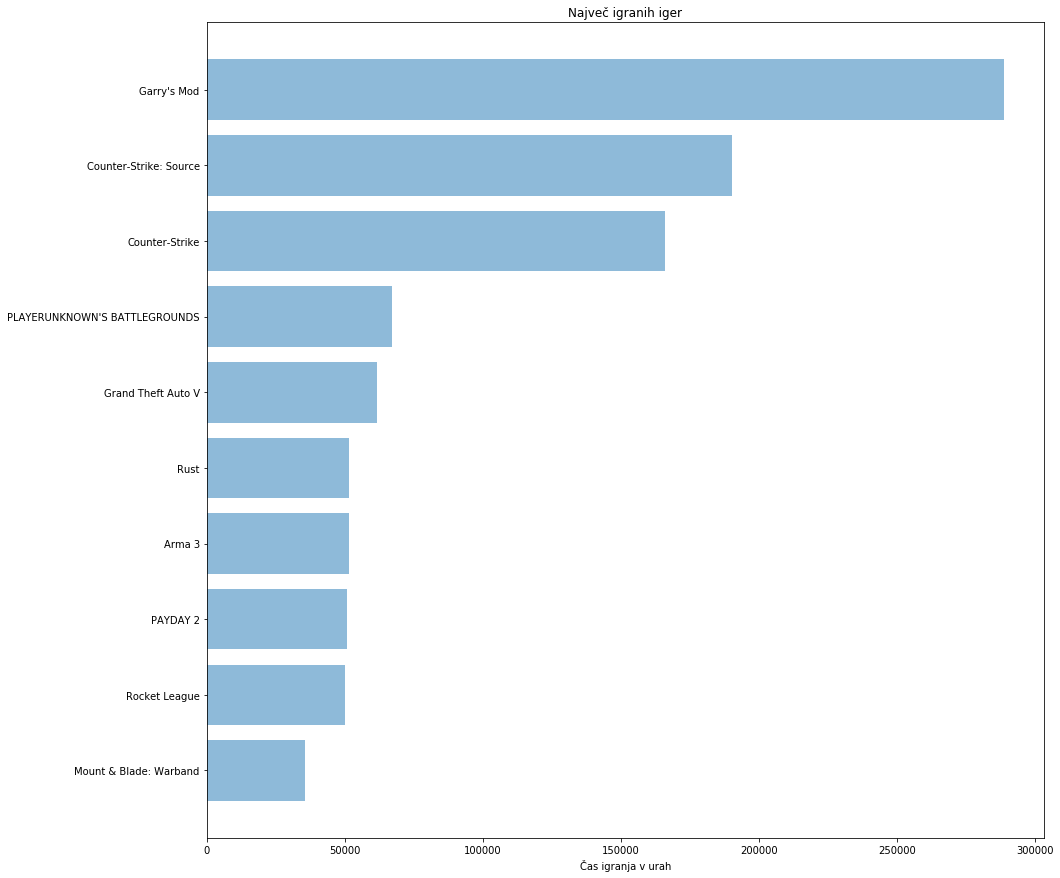

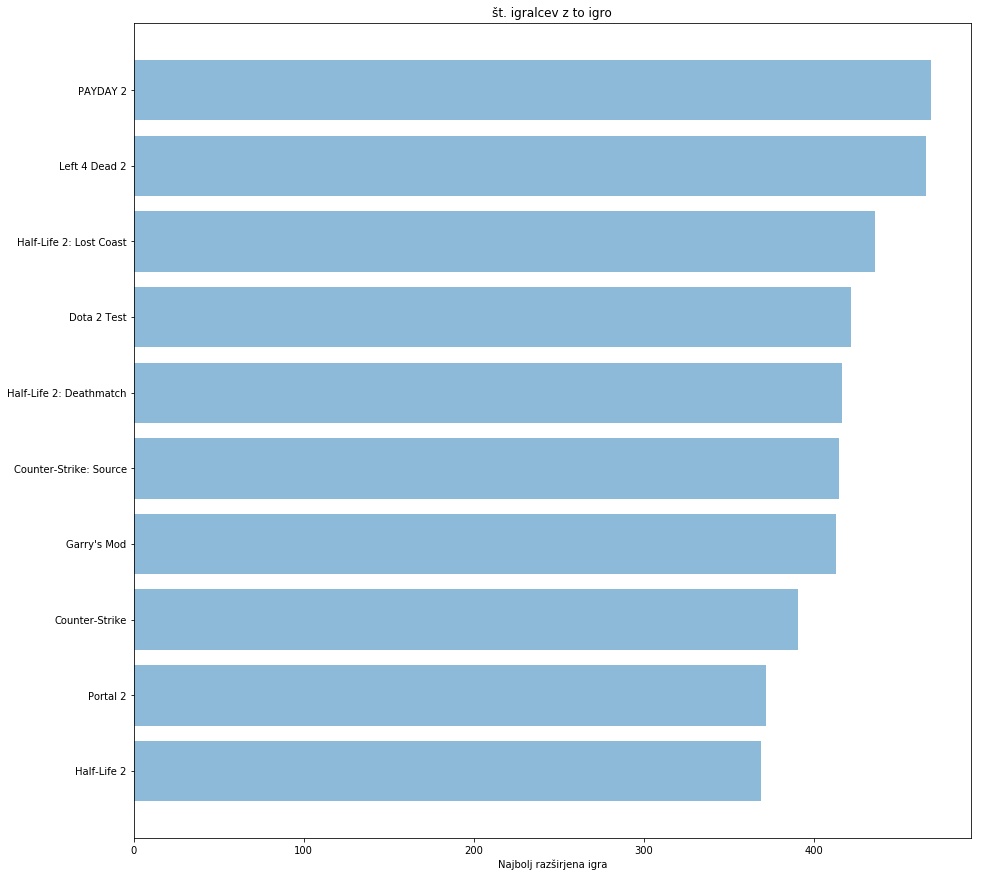

In [6]:
(TopBoughtGames,TopTotalPlaytime)=getMostCommonGamesAndHighestPlaytimeSorted(player_games)
plotTopPlaytimeGames(TopTotalPlaytime[10:0:-1])
plotTopBoughtGames(TopBoughtGames[10:0:-1])

252


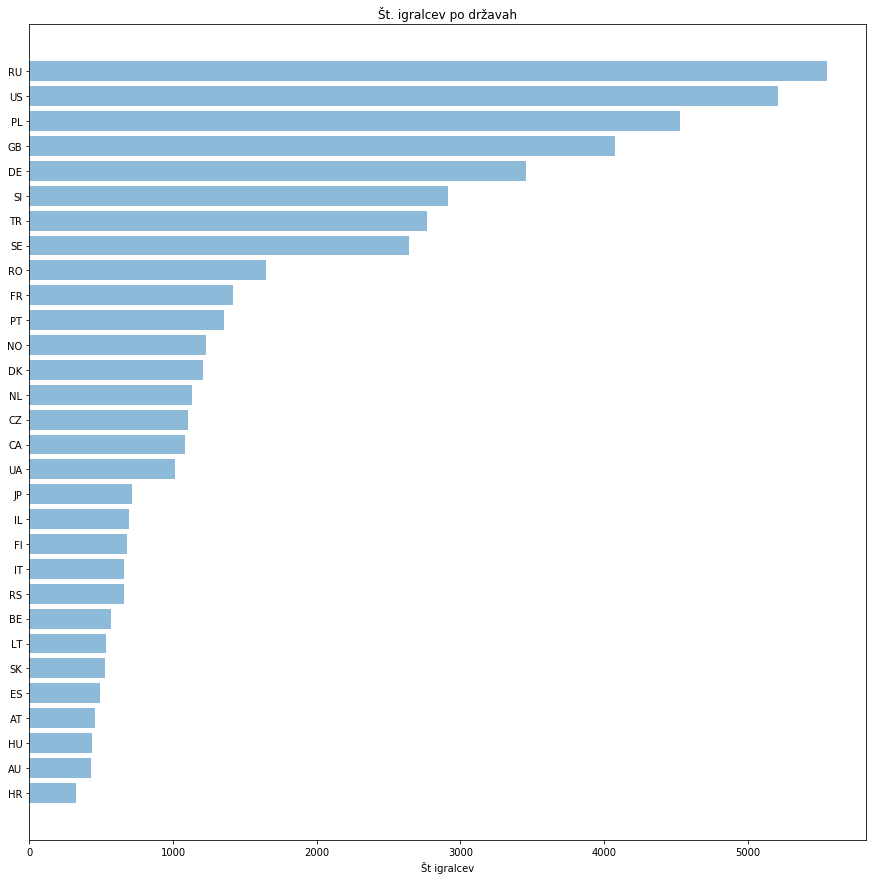

In [7]:
player_countries=dict()
for pid in player_summaries:
    if('cntry' in player_summaries[pid]):
        if(player_summaries[pid]['cntry'] not in player_countries):
            player_countries[player_summaries[pid]['cntry']]=0
        player_countries[player_summaries[pid]['cntry']]+=1
sortedPlayerCountries= sorted(player_countries.items(), key=lambda x: x[1], reverse=True)

def plotCountries( player_countries):
    number=[]
    countries=[]
    for country,persons in player_countries:
        countries.append(country)
        number.append(persons)
    y_pos = np.arange(len(countries))
    plt.figure(figsize=(15,15))
    plt.barh(countries,number, align='center', alpha=0.5)
    #plt.yticks(y_pos, games)
    plt.xlabel("Št igralcev")
    plt.title('Št. igralcev po državah')
    plt.show()
    return None
print(len(sortedPlayerCountries))
plotCountries(sortedPlayerCountries[30:0:-1])

Kakšen je common prefix med imenom in usernamom

In [8]:
#Uporabili bomo jellyfish za funkcije merjenja razdalj med dvema stringoma
#!pip install jellyfish
import jellyfish
#jellyfish.levenshtein_distance(  s1,s2 )
#jellyfish.jaro_distance(s1,s2 )
#jellyfish.damerau_levenshtein_distance(s1,s2)

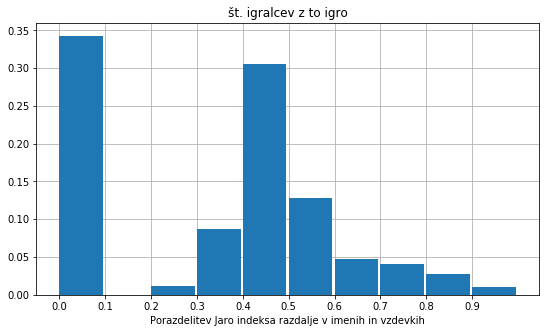

('Thorvald', 'Thorvald ter Meer')
('Berra', 'Bernardo')
('Robingg', 'Robin B')
('KentKennedy #Akk!', 'Kent Kennedy')
('Bostjan88', 'Bostjan')
('AnzeDragar', 'Anze Dragar')
('Nikkoff', 'Nikko')
('ninos10', 'nino')
('NinaFin', 'Nina Fininis')
('Justin500 DE', 'Justin')
('JacobofGames', 'Jacob')
('Robertbtw', 'Robert')
('xXxBen_DoverxXx', 'Ben Dover')


In [72]:
'''def commonprefix(m):
    "Given a list of pathnames, returns the longest common leading component"
    if not m: return ''
    s1 = min(m)
    s2 = max(m)
    for i, c in enumerate(s1):
        if c != s2[i]:
            return s1[:i]
    return s1
'''
import math
playerNamesSimilarity=[]
sameNames=[]
nameTabs=[0 for x in range(10)]
for pid in player_summaries:
    if('name' in player_summaries[pid] and 'rn' in player_summaries[pid]):
        a=jellyfish.jaro_distance(player_summaries[pid]['name'],player_summaries[pid]['rn'])
        playerNamesSimilarity.append(a)
        if(a<0.99 and a>0.8):
            sameNames.append((player_summaries[pid]['name'],player_summaries[pid]['rn']))
        nameTabs[math.floor(a*10)%10]+=1
j=sum(nameTabs)
for i in range(len(nameTabs)):
    nameTabs[i]=nameTabs[i]/j

plt.figure(figsize=(9,5))
labels=['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']

plt.grid(zorder=0)
plt.bar(labels,nameTabs, width=0.95, align='edge', alpha=1, zorder=3)
plt.xlabel("Porazdelitev Jaro indeksa razdalje v imenih in vzdevkih")
plt.title('št. igralcev z to igro')
plt.show()
selectedNames=[9,13,26,34,45,136,163,169,172,1251,1252,2010,2059]
for i in selectedNames:
    print(sameNames[i])

Katera igra je najbolj težka? ( povprečno dokončanje igre)

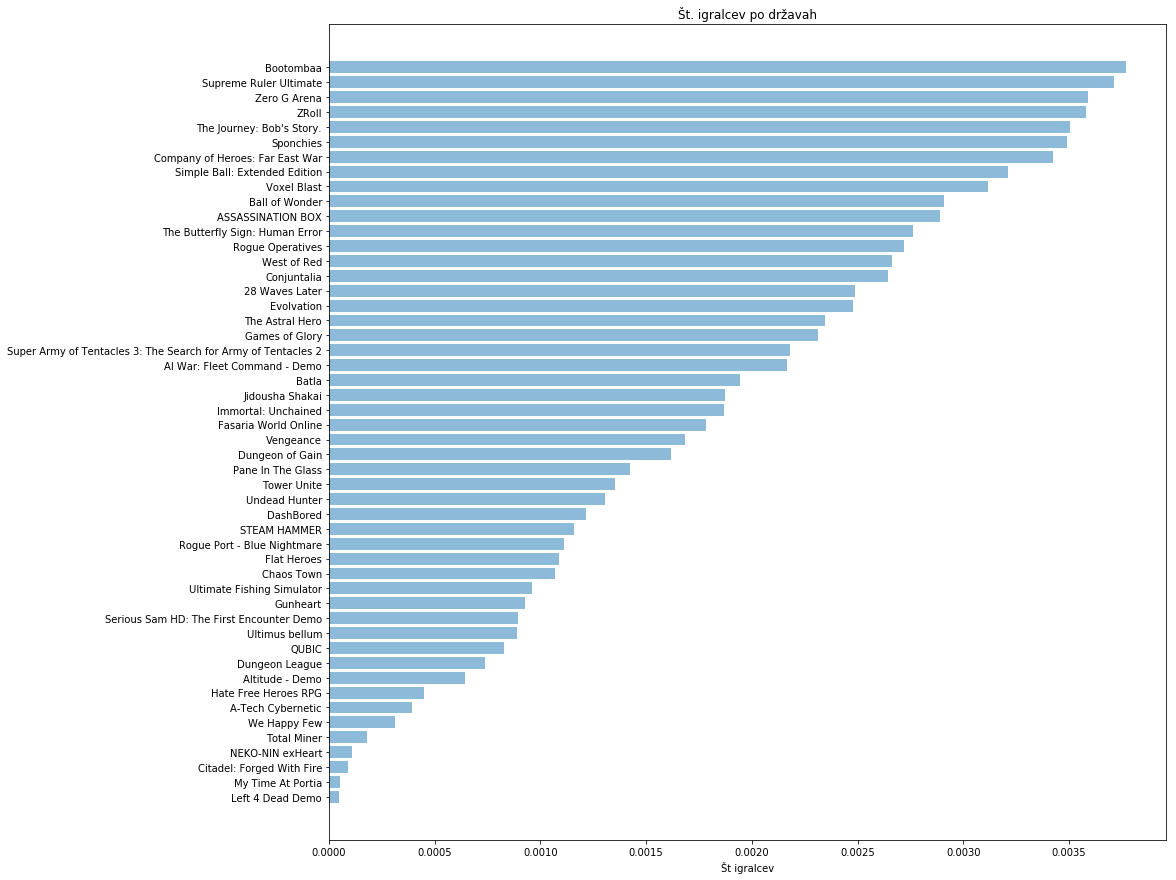

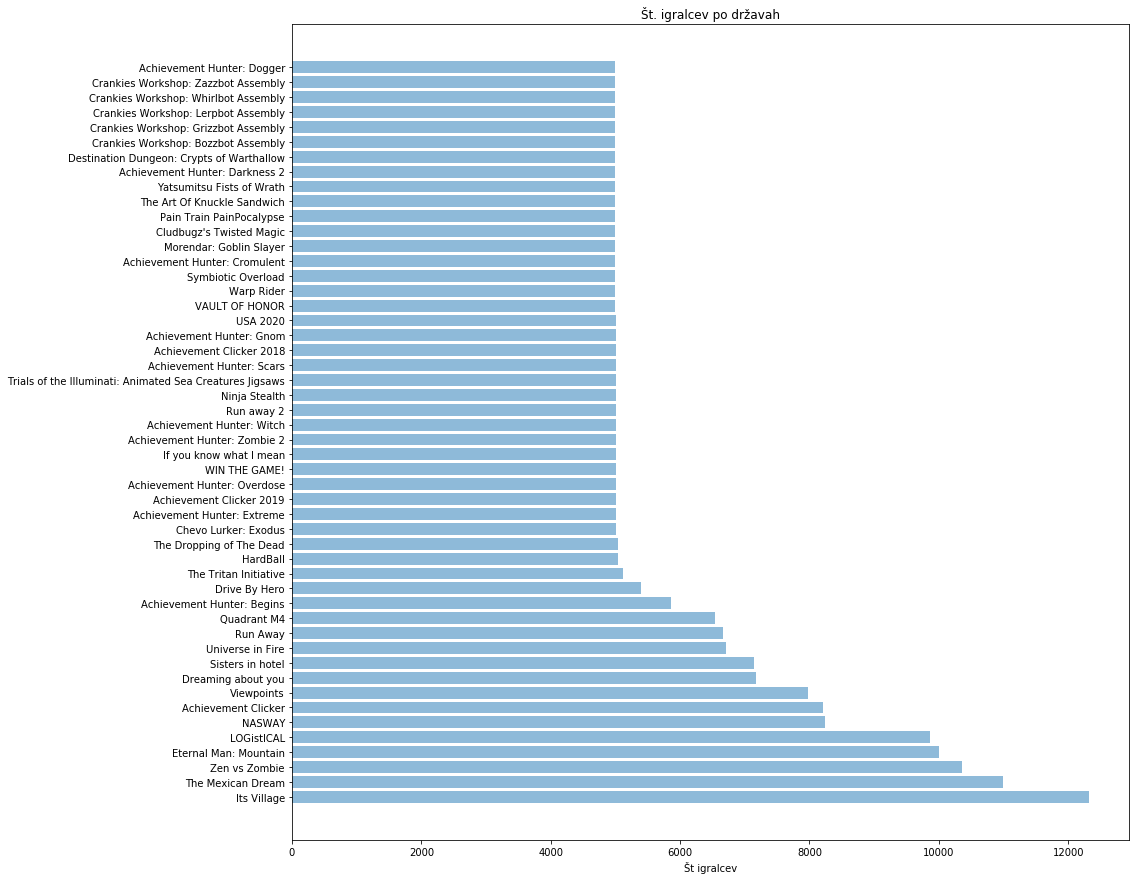

In [24]:
gameAverageFinish=[]
numOfAchievemts=dict()
for gid in global_game_stats:
    if(len(global_game_stats[str(gid)])!=0):
        povp=0
        num=0
        numOfAchievemts[gid]=0
        for stat in global_game_stats[str(gid)]['achievements']:
            numOfAchievemts[gid]+=1
            if(stat['percent']<=100):
                povp+=(stat['percent']/100)
                num+=1
        if(num>30 ):
            gameAverageFinish.append((gid,povp/num))
        
sortedGameAverageFinish= sorted(gameAverageFinish, key=lambda x: x[1], reverse=False)
sortedNumOfAchievements= sorted(numOfAchievemts.items(), key=lambda x: x[1], reverse=True)
gameIds=[]
gameAvg=[]
for i in sortedGameAverageFinish[0:50]:
    gameIds.append(game_names[i[0]])
    gameAvg.append(i[1])
    
y_pos = np.arange(len(gameIds))
plt.figure(figsize=(15,15))
plt.barh(gameIds,gameAvg, align='center', alpha=0.5)
#plt.yticks(y_pos, games)
plt.xlabel("Št igralcev")
plt.title('Št. igralcev po državah')
plt.show()

numGamesId=[]
numGamesNum=[]
for i in sortedNumOfAchievements[0:50]:
    numGamesId.append(game_names[i[0]])
    numGamesNum.append(i[1])

plt.figure(figsize=(15,15))
plt.barh(numGamesId,numGamesNum, align='center', alpha=0.5)
#plt.yticks(y_pos, games)
plt.xlabel("Št igralcev")
plt.title('Št. igralcev po državah')
plt.show()
    

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

### 4. Število prijateljev glede na "starost" računa

### 5. Odvisnost med težavnostjo igre in njenim uspehom